In [1]:
import pandas as pd

df = pd.read_csv(
    'data.txt', 
    sep='\t',
    header=1,
    names=['label', 'comment', 'author', 'subreddit', 'score', 'ups', 'downs', 'date', 'created_utc', 'parent_comment']
)
df['label'] = df['label'].apply(lambda val: 'Sarcasm' if val == 1 else 'NOT Sarcasm')
df['created_utc'] = pd.to_datetime(df['created_utc'])

In [17]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,score,ups,downs
count,1010772.000,1010772.000,1010772.000
mean,6.886,5.499,-0.146
std,48.344,41.274,0.353
min,-507.000,-507.000,-1.000
25%,1.000,0.000,0.000
50%,2.000,1.000,0.000
75%,4.000,3.000,0.000
max,9070.000,5163.000,0.000


In [18]:
def get_columns_info(df: pd.DataFrame) -> pd.DataFrame:
    columns_info = pd.DataFrame(df.count(), columns=['Not NAN'])
    columns_info['total'] = df.shape[0]
    return columns_info

get_columns_info(df)

,Not NAN,total
label,1010772,1010772
comment,1010772,1010772
author,1010772,1010772
subreddit,1010772,1010772
score,1010772,1010772
ups,1010772,1010772
downs,1010772,1010772
date,1010772,1010772
created_utc,1010772,1010772
parent_comment,1010772,1010772


In [56]:
df['label'].value_counts()

Sarcasm        489165
NOT Sarcasm    466115
Name: label, dtype: int64

# Let's clear gaps in data

In [19]:
df = df.dropna()
get_columns_info(df)

,Not NAN,total
label,1010772,1010772
comment,1010772,1010772
author,1010772,1010772
subreddit,1010772,1010772
score,1010772,1010772
ups,1010772,1010772
downs,1010772,1010772
date,1010772,1010772
created_utc,1010772,1010772
parent_comment,1010772,1010772


In [25]:
df['comment'].apply(len).describe()

count   1010772.000
mean         56.692
std          61.821
min           1.000
25%          27.000
50%          46.000
75%          74.000
max       10000.000
Name: comment, dtype: float64

## We need to clean up comments that are too short or too long

In [33]:
lens = df['comment'].apply(len)
df = df[(lens >= lens.quantile(0.03)) & (lens <= lens.quantile(0.97))]
print(f'Remainder: {df.shape[0]}')

Remainder: 955280


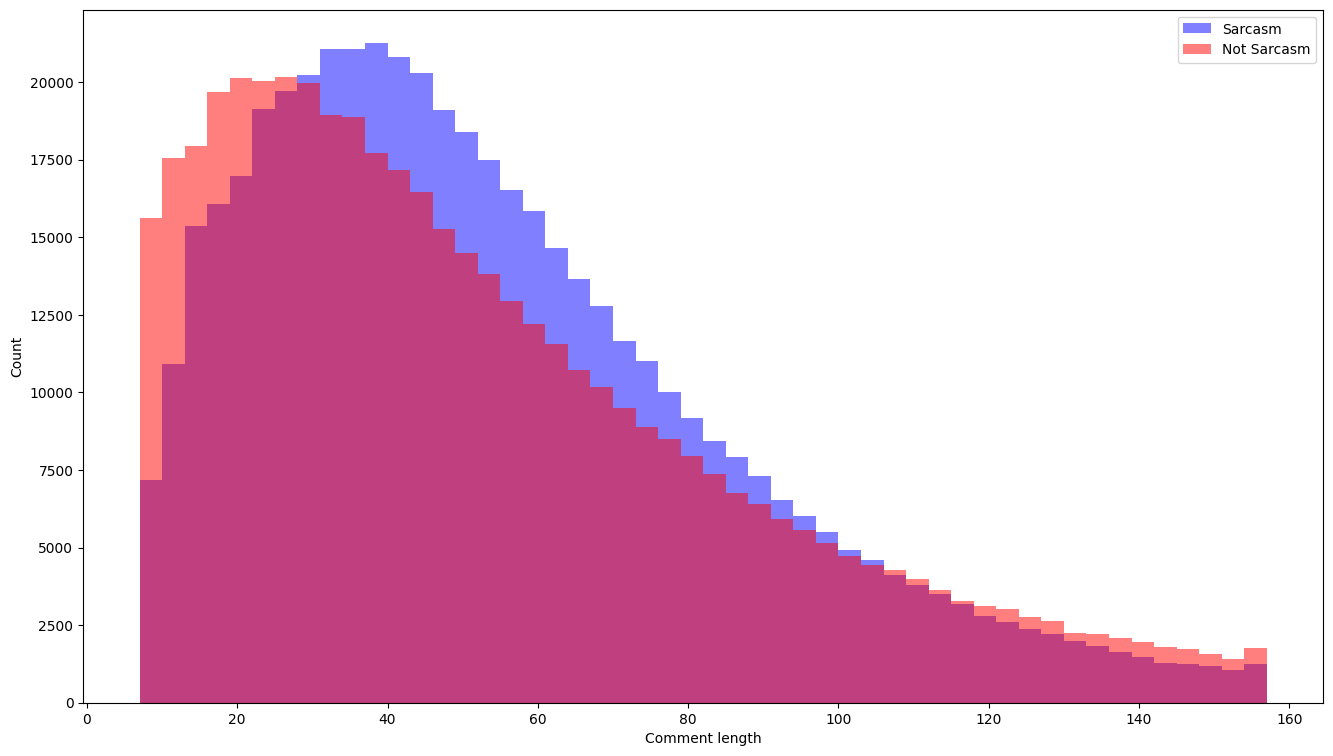

count   489165.000
mean        53.824
std         31.173
min          7.000
25%         30.000
50%         48.000
75%         72.000
max        157.000
Name: comment, dtype: float64


In [57]:
import numpy as np

sarcastic = df[df['label'] == 'Sarcasm']['comment'].apply(len)
not_sarcastic = df[df['label'] == 'NOT Sarcasm']['comment'].apply(len)

plt.figure(figsize=(16, 9))
plt.hist(sarcastic, bins=50, alpha=0.5, color='blue', label='Sarcasm')
plt.hist(not_sarcastic, bins=50, alpha=0.5, color='red', label='Not Sarcasm')
plt.legend()
plt.ylabel('Count')
plt.xlabel('Comment length')
plt.show()

pd.DataFrame.from_dict(
    'Sarcasm': sarcastic.describe(),
    'NOT Sarcasm': not